In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np

from gan.net import Generator, Discriminator
from data.mpii import MPIIDataset
from utils.vis import draw_keypoints

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from itertools import chain
from collections import defaultdict
from nltk.corpus import wordnet as wn

from data.mpii import MPIIDataset
from gan.net import Generator

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from random import randrange
from utils.vis import draw_keypoints

import argparse
import matplotlib.pyplot as plt
import json
from os.path import isfile

import numpy as np

In [7]:
checkpoint = torch.load('models/out_standing/final.pt')

In [8]:
gen = Generator().to('cuda')

In [9]:
gen.load_state_dict(checkpoint['g_state_dict'])

<All keys matched successfully>

In [10]:
d = Discriminator().to('cuda')
d.load_state_dict(checkpoint['d_state_dict'])

<All keys matched successfully>

In [11]:
dataset = MPIIDataset('../data/prepared_data/mpii_standing.json')

In [12]:
noise = Variable(torch.cuda.FloatTensor(np.random.normal(0, 1, (2, 32))), requires_grad=False)

In [13]:
out = gen(noise,  Variable(torch.cuda.LongTensor([1], device='cuda'))).cpu().detach().numpy()

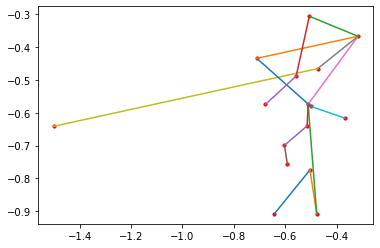

In [14]:
draw_keypoints(out[0])